In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/IBM.csv')  # Replace 'your_new_dataset.csv' with the path to your dataset


In [ ]:
# Display basic information about the dataset
print(dataset.info())

# Summary statistics
print(dataset.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15202 entries, 0 to 15201
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15202 non-null  object 
 1   Open       15202 non-null  float64
 2   High       15202 non-null  float64
 3   Low        15202 non-null  float64
 4   Close      15202 non-null  float64
 5   Adj Close  15202 non-null  float64
 6   Volume     15202 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 831.5+ KB
None
               Open          High           Low         Close     Adj Close  \
count  15202.000000  15202.000000  15202.000000  15202.000000  15202.000000   
mean      59.870226     60.426162     59.342259     59.887897     39.013995   
std       55.280873     55.731535     54.860107     55.304002     43.805940   
min        3.900574      4.098152      3.824092      3.900574      0.895433   
25%       15.535373     15.625000     15.415870     15.520435      4

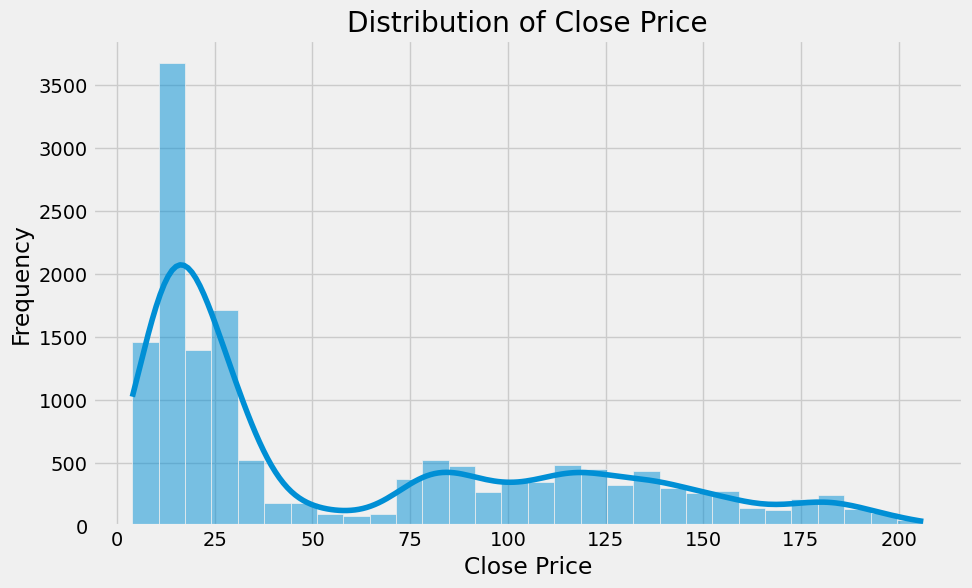

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualizations
# Distribution of a numerical variable (e.g., 'Close' price)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Close'], bins=30, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/IBM.csv')  # Replace 'your_new_dataset.csv' with the path to your dataset

# Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Display the first few rows of the dataset
print(dataset.head())


        Date      Open      High       Low     Close  Adj Close  Volume
0 1962-01-02  7.374124  7.374124  7.291268  7.291268   1.673325  407940
1 1962-01-03  7.291268  7.355003  7.291268  7.355003   1.687950  305955
2 1962-01-04  7.355003  7.355003  7.278521  7.281708   1.671130  274575
3 1962-01-05  7.272148  7.272148  7.125558  7.138305   1.638219  384405
4 1962-01-08  7.131931  7.131931  6.947100  7.004461   1.607504  572685


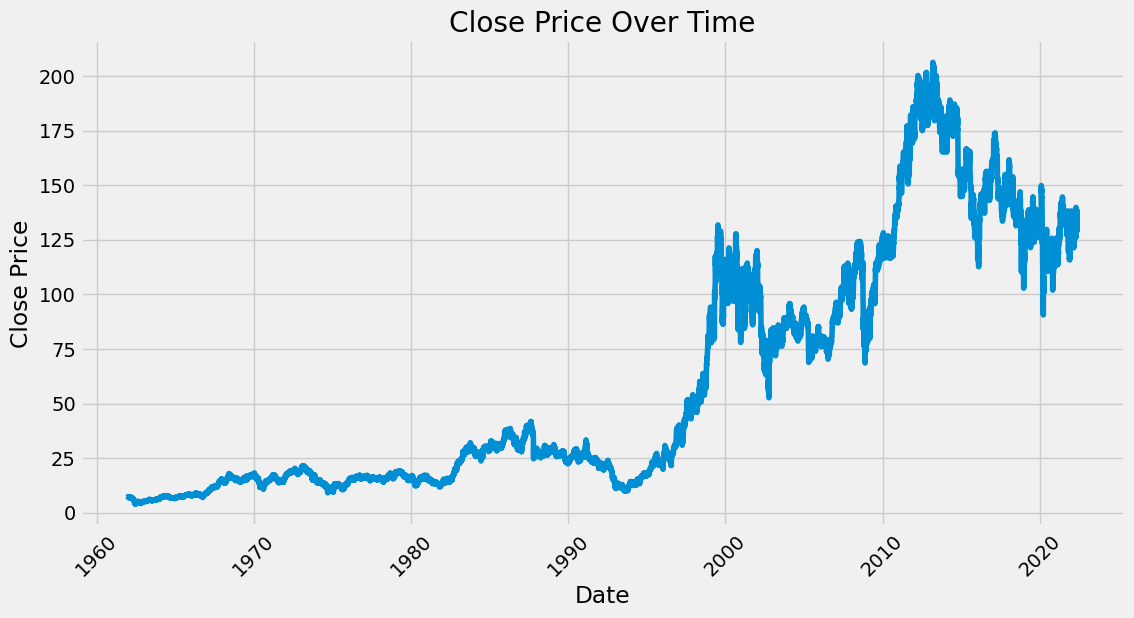

In [ ]:
# Line plot of 'Close' price over time
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

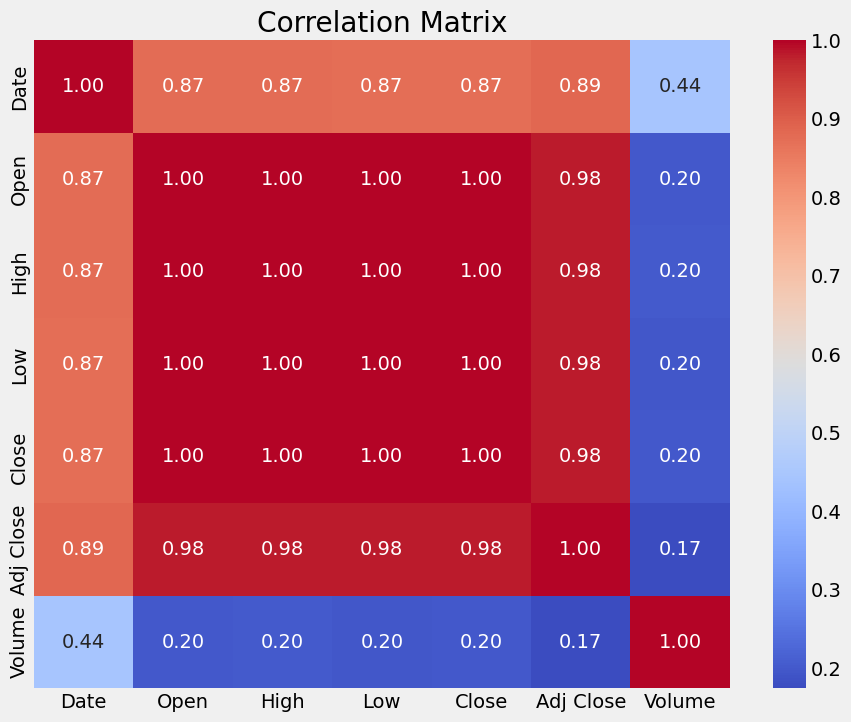

In [ ]:
# Correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

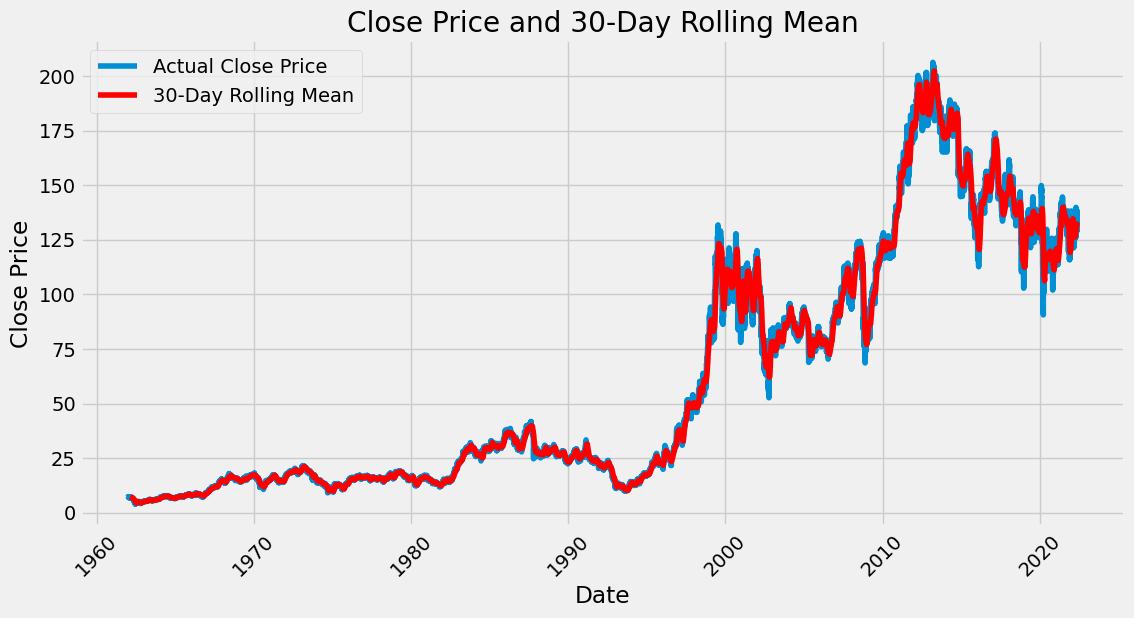

In [ ]:
# Example trend analysis using rolling mean
rolling_mean = dataset['Close'].rolling(window=30).mean()  # 30-day rolling mean
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Close'], label='Actual Close Price')
plt.plot(dataset['Date'], rolling_mean, label='30-Day Rolling Mean', color='red')
plt.title('Close Price and 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
# Example: Handling missing values
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


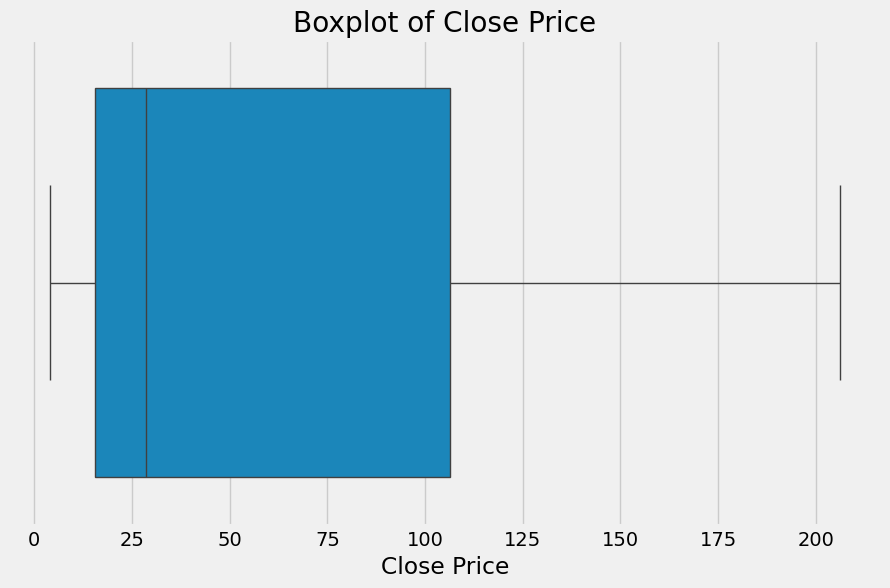

In [ ]:
# Example: Handling outliers
# Visualize boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Close'])
plt.title('Boxplot of Close Price')
plt.xlabel('Close Price')
plt.show()

In [ ]:
# Example: Feature engineering
# Extracting date components (year, month, day) from 'Date' column
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Day'] = pd.to_datetime(dataset['Date']).dt.day

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
import math
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Assuming your DataFrame is named 'df'
# Convert 'Date' column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Sort DataFrame by date
dataset.sort_values('Date', inplace=True)

In [ ]:
# Use only the 'Close' column for prediction
data = dataset['Close'].values.reshape(-1, 1)

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Function to create sequences for LSTM and GRU
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Define sequence length
sequence_length = 10

In [ ]:
# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Reshape data for LSTM and GRU
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])


In [ ]:
# Compile LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=85, batch_size=32)

Epoch 1/85
380/380 [==============================] - 10s 15ms/step - loss: 6.3962e-04
Epoch 2/85
380/380 [==============================] - 5s 13ms/step - loss: 1.0117e-04
Epoch 3/85
380/380 [==============================] - 6s 16ms/step - loss: 9.9379e-05
Epoch 4/85
380/380 [==============================] - 5s 12ms/step - loss: 8.8031e-05
Epoch 5/85
380/380 [==============================] - 6s 14ms/step - loss: 8.6855e-05
Epoch 6/85
380/380 [==============================] - 5s 13ms/step - loss: 6.7353e-05
Epoch 7/85
380/380 [==============================] - 5s 13ms/step - loss: 6.6481e-05
Epoch 8/85
380/380 [==============================] - 6s 16ms/step - loss: 5.9655e-05
Epoch 9/85
380/380 [==============================] - 5s 13ms/step - loss: 5.8285e-05
Epoch 10/85
380/380 [==============================] - 6s 16ms/step - loss: 4.2653e-05
Epoch 11/85
380/380 [==============================] - 5s 13ms/step - loss: 4.4032e-05
Epoch 12/85
380/380 [==============================

In [ ]:
# Define GRU model
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(sequence_length, 1)),
    GRU(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
# Compile GRU model with RMSprop optimizer and a different learning rate
gru_model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train GRU model
gru_model.fit(X_train, y_train, epochs=85, batch_size=32)

Epoch 1/85
380/380 [==============================] - 9s 13ms/step - loss: 2.9143e-05
Epoch 2/85
380/380 [==============================] - 6s 15ms/step - loss: 2.6680e-05
Epoch 3/85
380/380 [==============================] - 5s 12ms/step - loss: 2.6850e-05
Epoch 4/85
380/380 [==============================] - 6s 15ms/step - loss: 2.7328e-05
Epoch 5/85
380/380 [==============================] - 5s 13ms/step - loss: 2.7457e-05
Epoch 6/85
380/380 [==============================] - 5s 12ms/step - loss: 2.5666e-05
Epoch 7/85
380/380 [==============================] - 6s 15ms/step - loss: 2.6534e-05
Epoch 8/85
380/380 [==============================] - 5s 12ms/step - loss: 2.6045e-05
Epoch 9/85
380/380 [==============================] - 6s 15ms/step - loss: 2.7343e-05
Epoch 10/85
380/380 [==============================] - 5s 12ms/step - loss: 2.5718e-05
Epoch 11/85
380/380 [==============================] - 5s 13ms/step - loss: 2.5371e-05
Epoch 12/85
380/380 [==============================]

In [ ]:
# Assuming you have already trained your LSTM and GRU models and named them lstm_model and gru_model

# Predictions for LSTM model
lstm_predictions = lstm_model.predict(X_test)

# Predictions for GRU model
gru_predictions = gru_model.predict(X_test)

95/95 [==============================] - 1s 4ms/step


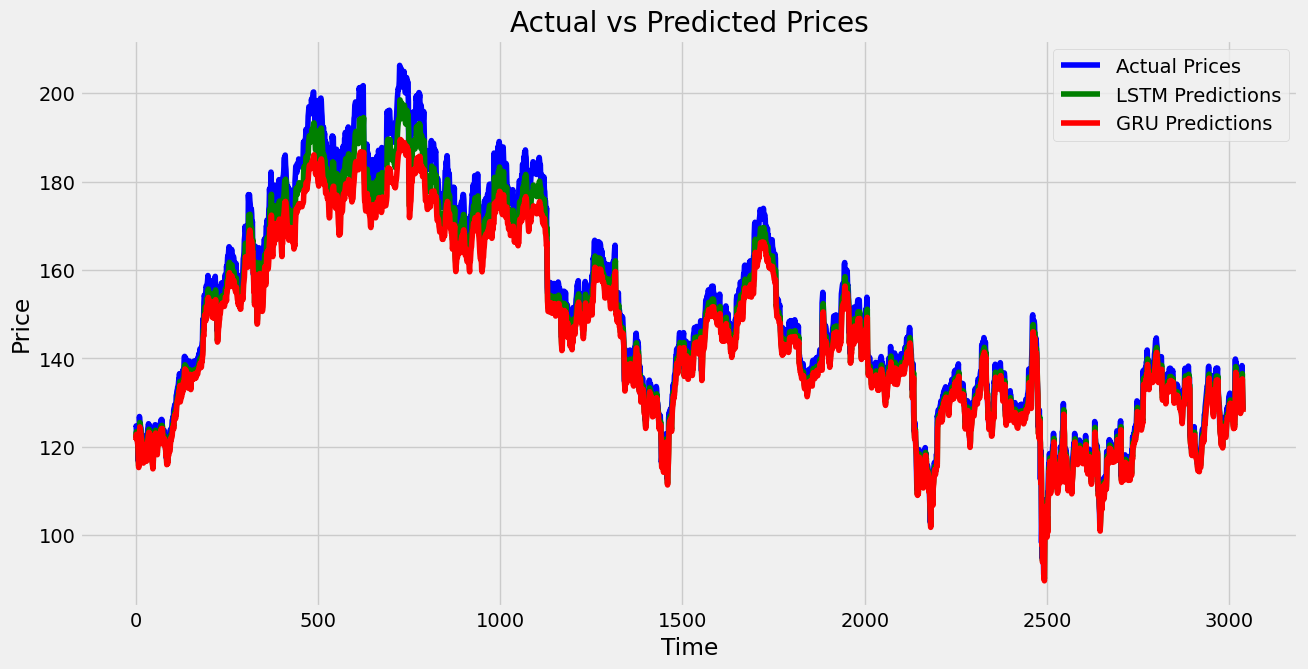

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(actual_prices, lstm_predictions, gru_predictions):
    plt.figure(figsize=(14, 7))
    plt.plot(actual_prices, label='Actual Prices', color='blue')
    plt.plot(lstm_predictions, label='LSTM Predictions', color='green')
    plt.plot(gru_predictions, label='GRU Predictions', color='red')

    plt.title('Actual vs Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Assuming 'actual_prices', 'lstm_predictions', and 'gru_predictions' are numpy arrays of the actual prices and predictions
plot_actual_vs_predicted(actual_prices=scaler.inverse_transform(y_test.reshape(-1, 1)),
                         lstm_predictions=scaler.inverse_transform(lstm_predictions),
                         gru_predictions=scaler.inverse_transform(gru_predictions))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def calculate_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    return rmse

# Calculate RMSE for LSTM model
lstm_rmse = calculate_rmse(lstm_model, X_test, y_test)

# Calculate RMSE for GRU model
gru_rmse = calculate_rmse(gru_model, X_test, y_test)

print("LSTM RMSE:", lstm_rmse)
print("GRU RMSE:", gru_rmse)

95/95 [==============================] - 0s 5ms/step
LSTM RMSE: 0.018762071419874588
GRU RMSE: 0.029868428809847594


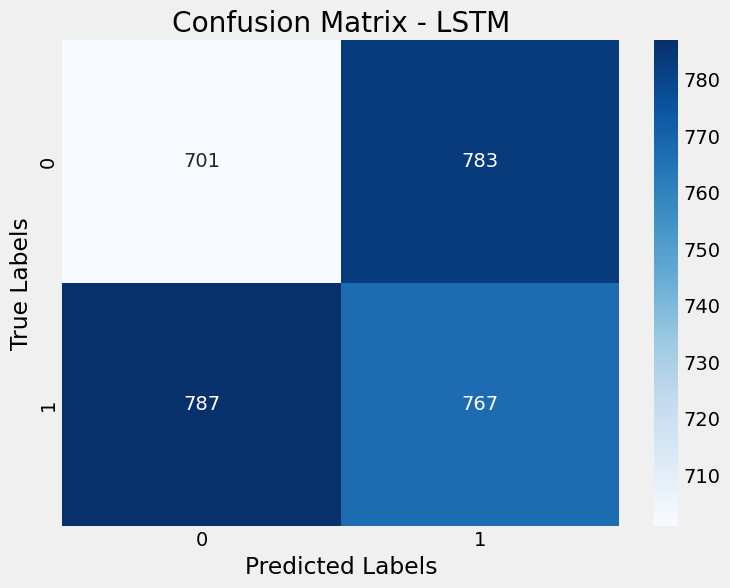

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for LSTM
lstm_conf_matrix = confusion_matrix(y_test_labels, lstm_labels)

# Calculate confusion matrix for GRU
gru_conf_matrix = confusion_matrix(y_test_labels, gru_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for LSTM
plot_confusion_matrix(lstm_conf_matrix, title='Confusion Matrix - LSTM')


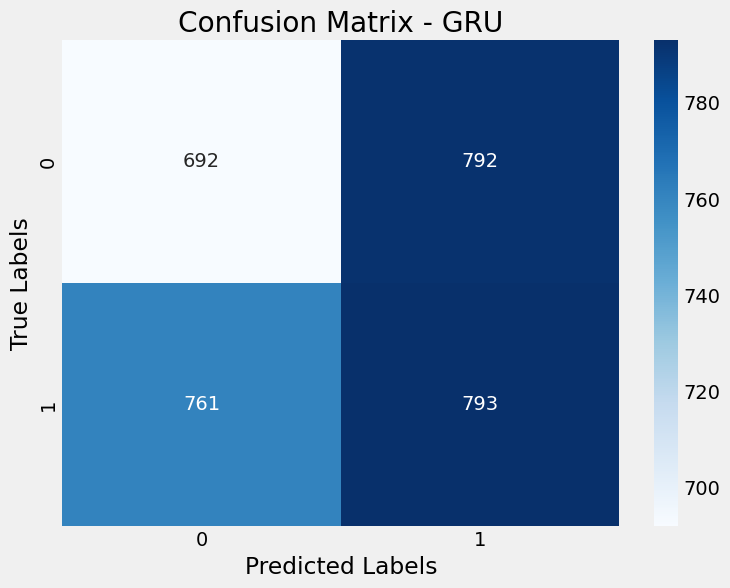

In [ ]:
# Plot confusion matrix for GRU
plot_confusion_matrix(gru_conf_matrix, title='Confusion Matrix - GRU')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Function to convert predictions into labels
def convert_to_labels(predictions):
    labels = []
    for i in range(1, len(predictions)):
        if predictions[i] > predictions[i-1]:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [ ]:
# Convert predictions to labels for LSTM and GRU
lstm_labels = convert_to_labels(lstm_predictions)
gru_labels = convert_to_labels(gru_predictions)
y_test_labels = convert_to_labels(scaler.inverse_transform(y_test.reshape(-1, 1)))


In [ ]:
# Calculate metrics for LSTM
lstm_precision = precision_score(y_test_labels, lstm_labels)
lstm_recall = recall_score(y_test_labels, lstm_labels)
lstm_f1 = f1_score(y_test_labels, lstm_labels)
lstm_accuracy = accuracy_score(y_test_labels, lstm_labels)

print("LSTM Precision:", lstm_precision)
print("LSTM Recall:", lstm_recall)
print("LSTM F1 Score:", lstm_f1)
print("LSTM Accuracy:", lstm_accuracy)


LSTM Precision: 0.49483870967741933
LSTM Recall: 0.49356499356499356
LSTM F1 Score: 0.494201030927835
LSTM Accuracy: 0.48321263989466756


In [ ]:

# Calculate metrics for GRU
gru_precision = precision_score(y_test_labels, gru_labels)
gru_recall = recall_score(y_test_labels, gru_labels)
gru_f1 = f1_score(y_test_labels, gru_labels)
gru_accuracy = accuracy_score(y_test_labels, gru_labels)

print("GRU Precision:", gru_precision)
print("GRU Recall:", gru_recall)
print("GRU F1 Score:", gru_f1)
print("GRU Accuracy:", gru_accuracy)


GRU Precision: 0.49620733249051835
GRU Recall: 0.5051480051480052
GRU F1 Score: 0.5006377551020408
GRU Accuracy: 0.48452929558920343


In [ ]:
# Example code to calculate accuracy in terms of 100 percent
from sklearn.metrics import accuracy_score

# Assuming you have obtained predictions for both LSTM and GRU models
# lstm_labels and gru_labels are the predicted labels
# y_test_labels is the true labels

# Calculate accuracy for LSTM model
lstm_accuracy = accuracy_score(y_test_labels, lstm_labels) * 100
print("LSTM Accuracy:", lstm_accuracy)

# Calculate accuracy for GRU model
gru_accuracy = accuracy_score(y_test_labels, gru_labels) * 100
print("GRU Accuracy:", gru_accuracy)


LSTM Accuracy: 48.32126398946676
GRU Accuracy: 48.452929558920346


In [ ]:
# Assuming you have obtained predictions for both LSTM and GRU models
# lstm_labels and gru_labels are the predicted labels
# y_test_labels is the true labels

# Calculate accuracy for LSTM model
lstm_accuracy = accuracy_score(y_test_labels, lstm_labels) * 100
print("LSTM Accuracy (Test): {:.2f}%".format(lstm_accuracy))

# Calculate accuracy for GRU model
gru_accuracy = accuracy_score(y_test_labels, gru_labels) * 100
print("GRU Accuracy (Test): {:.2f}%".format(gru_accuracy))


LSTM Accuracy (Test): 48.32%
GRU Accuracy (Test): 48.45%
